# Strategic Analysis of Ride-Share Driver Earnings

This analysis consolidates findings from Uber and Lyft driver pay and tips, considering both weather conditions and weekday trends, to provide strategic insights for drivers.

> Weekday Earning Patterns:

- Mid-Week Peaks (Wednesday & Thursday): Both Uber and Lyft show their highest average daily pay on "Wednesday" and "Thursday." This indicates consistent demand across platforms during the mid-week.

  * Driver Strategy: Maximize driving hours during these days for potentially higher overall earnings.
     
- Weekend Pay vs. Tips:

 Saturday: Lowest average pay for Lyft, and generally lower tips for both platforms.

 Sunday: Lowest tips for Uber, and also lower for Lyft.

* Driver Strategy: Weekends might see a higher volume of rides, but the data suggests average per-ride pay and tips might be lower. Drivers should consider if higher volume outweighs lower per-ride earnings on these days, or focus on strategic times.

- Tuesday's Tipping Anomaly: "Tuesday" stands out for Uber with its highest average tips, while also being Uber's lowest average pay day. For Lyft, "Tuesday" also has high tips.

* Driver Strategy: If tips are a primary goal, "Tuesday" could be a good day to drive for either platform, despite potentially lower base fares on Uber.


> Weather-Dependent Earning Optimization:

- Light to Moderate Conditions (Light Rain, Overcast, Cloudy, Clear): Uber generally offers higher average pay. This suggests Uber might have higher demand or better surge pricing during these common conditions. Drivers could prioritize Uber.

- Adverse Weather (Heavy Rain, Fog, Heavy Rain Shower): Lyft's average pay tends to be higher. This is particularly noticeable during "Heavy Rain" and "Fog," where Lyft's pay surpasses Uber's. Crucially, "Heavy Rain Shower" sees a significant boost in Lyft tips, making it a highly lucrative condition for Lyft drivers, despite Uber's pay dropping sharply.

* Driver Strategy: When weather turns severe, consider switching to Lyft, as it seems to command higher fares and significantly better tips, likely due to increased demand and willingness from riders to pay more for reliable service in difficult conditions.




> Comparative Platform Strengths:

- Uber's Consistency: Tends to offer more consistent higher pay in common, less severe weather, and during early/mid-week days.

- Lyft's Niche in Adversity & Specific Weekdays: Appears to be more profitable in challenging weather conditions and shines with higher pay on "Thursday" and "Wednesday" and better tips on many weekdays, especially weekends.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
# Connect to the SQLite database
conn = sqlite3.connect("results/ride_share.db")

In [5]:
# Fetch ALL data from 'ride_share_table' into a single DataFrame
ride_share_df = pd.read_sql_query("SELECT * FROM ride_share_table;", conn)

In [7]:
# Close the connection
conn.close()

In [9]:
ride_share_df.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag,cbd_congestion_fee,weather_condition
0,HV0003,B03404,B03404,2025-03-03 08:50:50,2025-03-03 08:51:10,2025-03-03 08:53:11,2025-03-03 09:04:35,161,162,0.57,...,0.0,0.0,7.70,N,N,N,N,N,1.5,Clear
1,HV0003,B03404,B03404,2025-03-30 10:01:05,2025-03-30 10:04:45,2025-03-30 10:05:02,2025-03-30 10:17:03,61,37,2.14,...,0.0,0.0,14.55,N,N,N,N,N,0.0,Cloudy
2,HV0003,B03404,B03404,2025-03-15 08:10:41,2025-03-15 08:14:21,2025-03-15 08:16:22,2025-03-15 08:20:29,200,220,0.92,...,0.0,0.0,6.00,N,N,N,N,Y,0.0,Overcast
3,HV0003,B03404,B03404,2025-03-01 05:42:30,2025-03-01 05:55:15,2025-03-01 05:56:45,2025-03-01 06:38:43,249,177,7.57,...,0.0,0.0,40.38,N,N,N,N,N,1.5,Cloudy
4,HV0003,B03404,B03404,2025-03-09 01:51:57,2025-03-09 01:54:59,2025-03-09 01:57:01,2025-03-09 03:15:13,157,61,3.77,...,0.0,0.0,16.35,N,N,N,N,N,0.0,Clear


In [11]:
ride_share_df.dtypes

hvfhs_license_num        object
dispatching_base_num     object
originating_base_num     object
request_datetime         object
on_scene_datetime        object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
trip_miles              float64
trip_time                 int64
base_passenger_fare     float64
tolls                   float64
bcf                     float64
sales_tax               float64
congestion_surcharge    float64
airport_fee             float64
tips                    float64
driver_pay              float64
shared_request_flag      object
shared_match_flag        object
access_a_ride_flag       object
wav_request_flag         object
wav_match_flag           object
cbd_congestion_fee      float64
weather_condition        object
dtype: object

In [13]:
# Convert the necessary columns to datetime format
ride_share_df["request_datetime"] = pd.to_datetime(ride_share_df["request_datetime"])
ride_share_df["on_scene_datetime"] = pd.to_datetime(ride_share_df["on_scene_datetime"])
ride_share_df["pickup_datetime"] = pd.to_datetime(ride_share_df["pickup_datetime"])
ride_share_df["dropoff_datetime"] = pd.to_datetime(ride_share_df["dropoff_datetime"])

In [15]:
ride_share_df.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
cbd_congestion_fee             float64
weather_condition        

In [17]:
# Extract the date part from pickup_datetime for daily grouping
ride_share_df['pickup_date'] = ride_share_df['pickup_datetime'].dt.date

In [19]:
# Group by date and license number, then calculate the mean of 'driver_pay'.
daily_avg_pay = ride_share_df.groupby(['pickup_date', 'hvfhs_license_num'])['driver_pay'].mean()

In [21]:
# Reshape the data for plotting: move 'hvfhs_license_num' from index to columns.
daily_avg_pay_unstacked = daily_avg_pay.unstack()

In [23]:
# Rename columns for readability (HV0003: Uber, HV0005: Lyft).
daily_avg_pay_unstacked.columns = [
    'Uber_Daily_Avg_Pay' if col == 'HV0003' else 'Lyft_Daily_Avg_Pay'
    for col in daily_avg_pay_unstacked.columns
]

# Sort the index (dates) to ensure the plot is chronological.
daily_avg_pay_unstacked = daily_avg_pay_unstacked.sort_index()

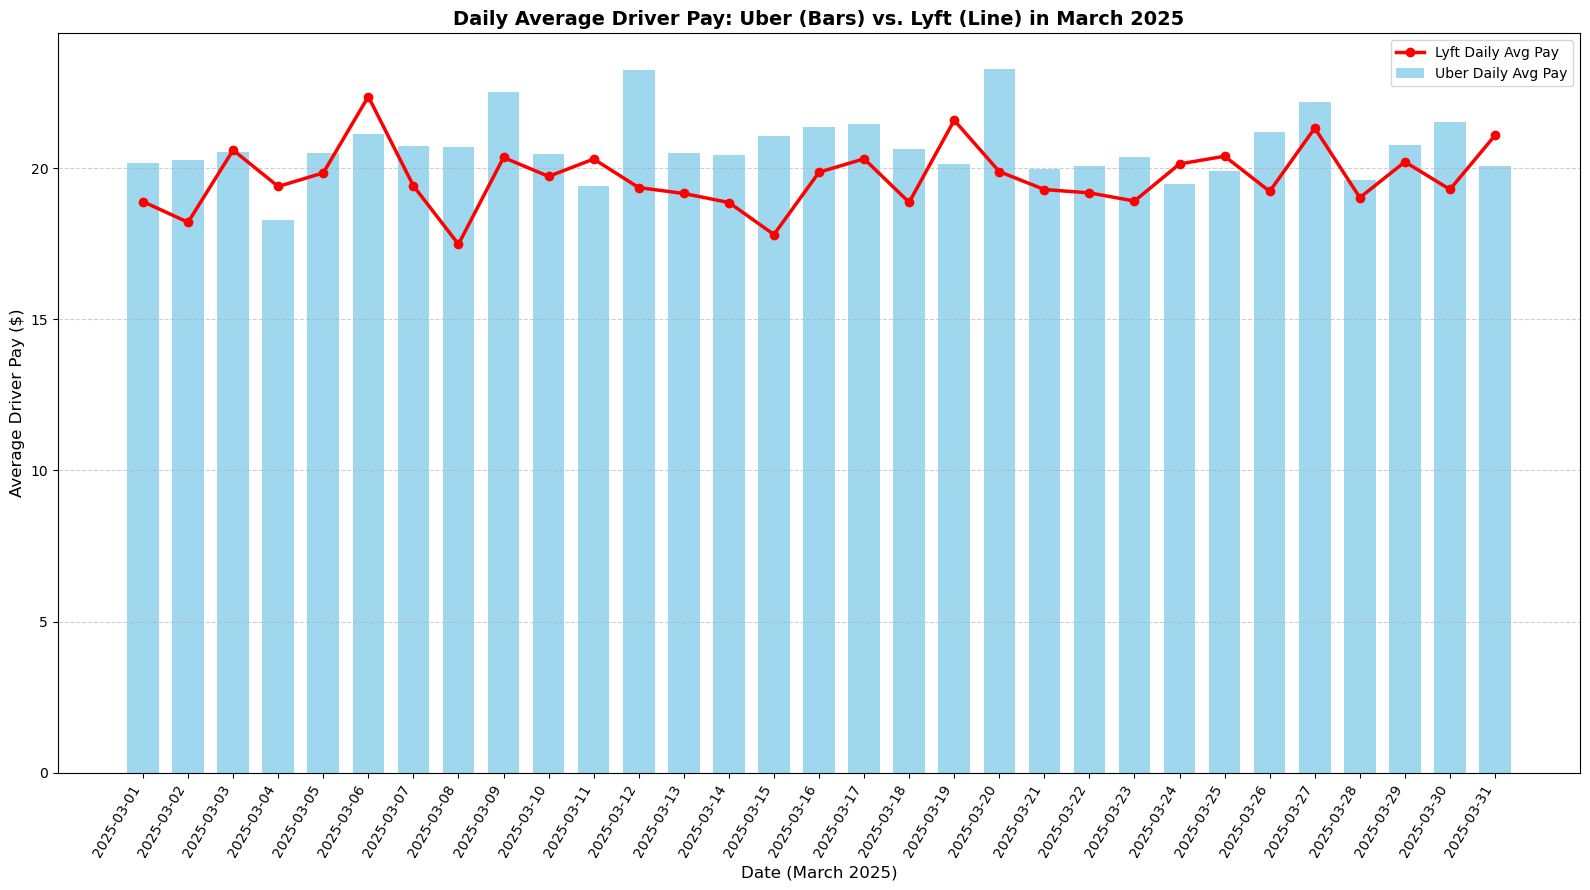

In [25]:
# Create the Bar Plot for Uber and line chart for Lyft 
plt.figure(figsize=(16, 9)) 

# Bar chart for Uber's daily average pay
plt.bar(daily_avg_pay_unstacked.index.astype(str), daily_avg_pay_unstacked['Uber_Daily_Avg_Pay'],
        color='skyblue', label='Uber Daily Avg Pay', width=0.7, alpha=0.8)

# Line graph for Lyft's daily average pay
plt.plot(daily_avg_pay_unstacked.index.astype(str), daily_avg_pay_unstacked['Lyft_Daily_Avg_Pay'],
         color='red', marker='o', linestyle='-', linewidth=2.5, markersize=6,
         label='Lyft Daily Avg Pay')

plt.xlabel('Date (March 2025)', fontsize=12)
plt.ylabel('Average Driver Pay ($)', fontsize=12)
plt.title('Daily Average Driver Pay: Uber (Bars) vs. Lyft (Line) in March 2025', fontsize=14, fontweight='bold')

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

plt.savefig('images/daily_avg_driver_pay.png')

plt.show()

plt.close('all')

In [27]:
daily_avg_pay_unstacked.head(10)

,Uber_Daily_Avg_Pay,Lyft_Daily_Avg_Pay
pickup_date,,
2025-03-01,20.157328,18.890139
2025-03-02,20.264169,18.204985
2025-03-03,20.514595,20.593507
2025-03-04,18.287711,19.390342
2025-03-05,20.503944,19.839498
2025-03-06,21.129877,22.363111
2025-03-07,20.716399,19.410984
2025-03-08,20.694746,17.479239
2025-03-09,22.522716,20.349321


In [29]:
# converting the index dates to datetime format
daily_avg_pay_unstacked.index = pd.to_datetime(daily_avg_pay_unstacked.index)

In [31]:
# Add a 'weekday' column
daily_avg_pay_unstacked['weekday'] = daily_avg_pay_unstacked.index.day_name()

In [33]:
# Define the order of weekdays for proper sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [35]:
# calculate the mean
weekly_avg_pay_df = daily_avg_pay_unstacked.groupby('weekday')[['Uber_Daily_Avg_Pay', 'Lyft_Daily_Avg_Pay']].mean()

In [37]:
# reindex the column
weekly_avg_pay_df = weekly_avg_pay_df.reindex(weekday_order)

In [39]:
weekly_avg_pay_df

,Uber_Daily_Avg_Pay,Lyft_Daily_Avg_Pay
weekday,,
Monday,20.397895,20.368012
Tuesday,19.554802,19.736196
Wednesday,21.271590,20.000584
Thursday,21.778632,20.681471
Friday,20.181291,19.145469
Saturday,20.549116,18.710420
Sunday,21.202896,19.323405


In [41]:
# Group by both 'weather_condition' and 'hvfhs_license_num'
# Then calculate the mean of 'driver_pay' and unstack 'hvfhs_license_num'
avg_pay_by_weather_service = ride_share_df.groupby(['weather_condition', 'hvfhs_license_num'])['driver_pay'].mean().unstack()

In [43]:
# rename the columns 
column_rename_map = {
    'HV0003': 'Uber_Avg_Pay',
    'HV0005': 'Lyft_Avg_Pay'
}
avg_pay_by_weather_service = avg_pay_by_weather_service.rename(columns=column_rename_map)

In [45]:
# Sort by the average Uber pay
avg_pay_by_weather_service = avg_pay_by_weather_service.sort_values(by='Uber_Avg_Pay', ascending=False)

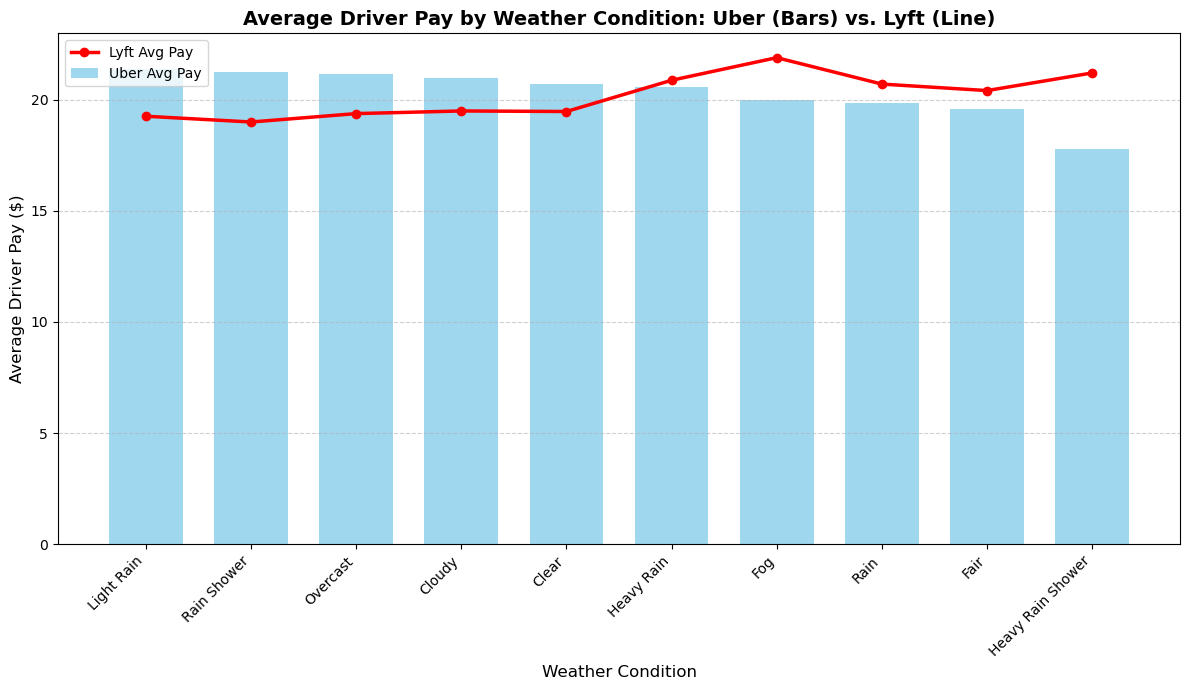

In [47]:
# Create the Bar Plot for Uber and Line Chart for Lyft by Weather Condition
plt.figure(figsize=(12, 7))

# Bar chart for Uber's average pay by weather condition
plt.bar(avg_pay_by_weather_service.index, avg_pay_by_weather_service['Uber_Avg_Pay'],
        color='skyblue', label='Uber Avg Pay', width=0.7, alpha=0.8)

# Line graph for Lyft's average pay by weather condition, overlaid
plt.plot(avg_pay_by_weather_service.index, avg_pay_by_weather_service['Lyft_Avg_Pay'],
         color='red', marker='o', linestyle='-', linewidth=2.5, markersize=6,
         label='Lyft Avg Pay')

plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Driver Pay ($)', fontsize=12)
plt.title('Average Driver Pay by Weather Condition: Uber (Bars) vs. Lyft (Line)', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(fontsize=10)

plt.tight_layout()

plt.savefig('images/avg_driver_pay_weather.png')

plt.show()

plt.close('all')

In [49]:
avg_pay_by_weather_service

hvfhs_license_num,Uber_Avg_Pay,Lyft_Avg_Pay
weather_condition,,
Light Rain,21.356748,19.254419
Rain Shower,21.243023,18.994808
Overcast,21.171387,19.372700
Cloudy,20.977167,19.491755
Clear,20.691543,19.467233
Heavy Rain,20.571088,20.872616
Fog,19.962874,21.889113
Rain,19.834712,20.700598
Fair,19.565498,20.408929


# on tips

In [52]:
# Extract the date part from pickup_datetime for daily grouping
ride_share_df['pickup_date'] = ride_share_df['pickup_datetime'].dt.date

In [54]:
# Group by date and license number, then calculate the mean of 'tips'.
daily_avg_tips = ride_share_df.groupby(['pickup_date', 'hvfhs_license_num'])['tips'].mean()

In [56]:
# Reshape the data for plotting: move 'hvfhs_license_num' from index to columns.
daily_avg_tips_unstacked = daily_avg_tips.unstack()

In [58]:
# Rename columns for readability (HV0003: Uber, HV0005: Lyft).
daily_avg_tips_unstacked.columns = [
    'Uber_Daily_Avg_Tips' if col == 'HV0003' else 'Lyft_Daily_Avg_Tips'
    for col in daily_avg_tips_unstacked.columns
]

# Sort the index (dates) to ensure the plot is chronological.
daily_avg_tips_unstacked = daily_avg_tips_unstacked.sort_index()

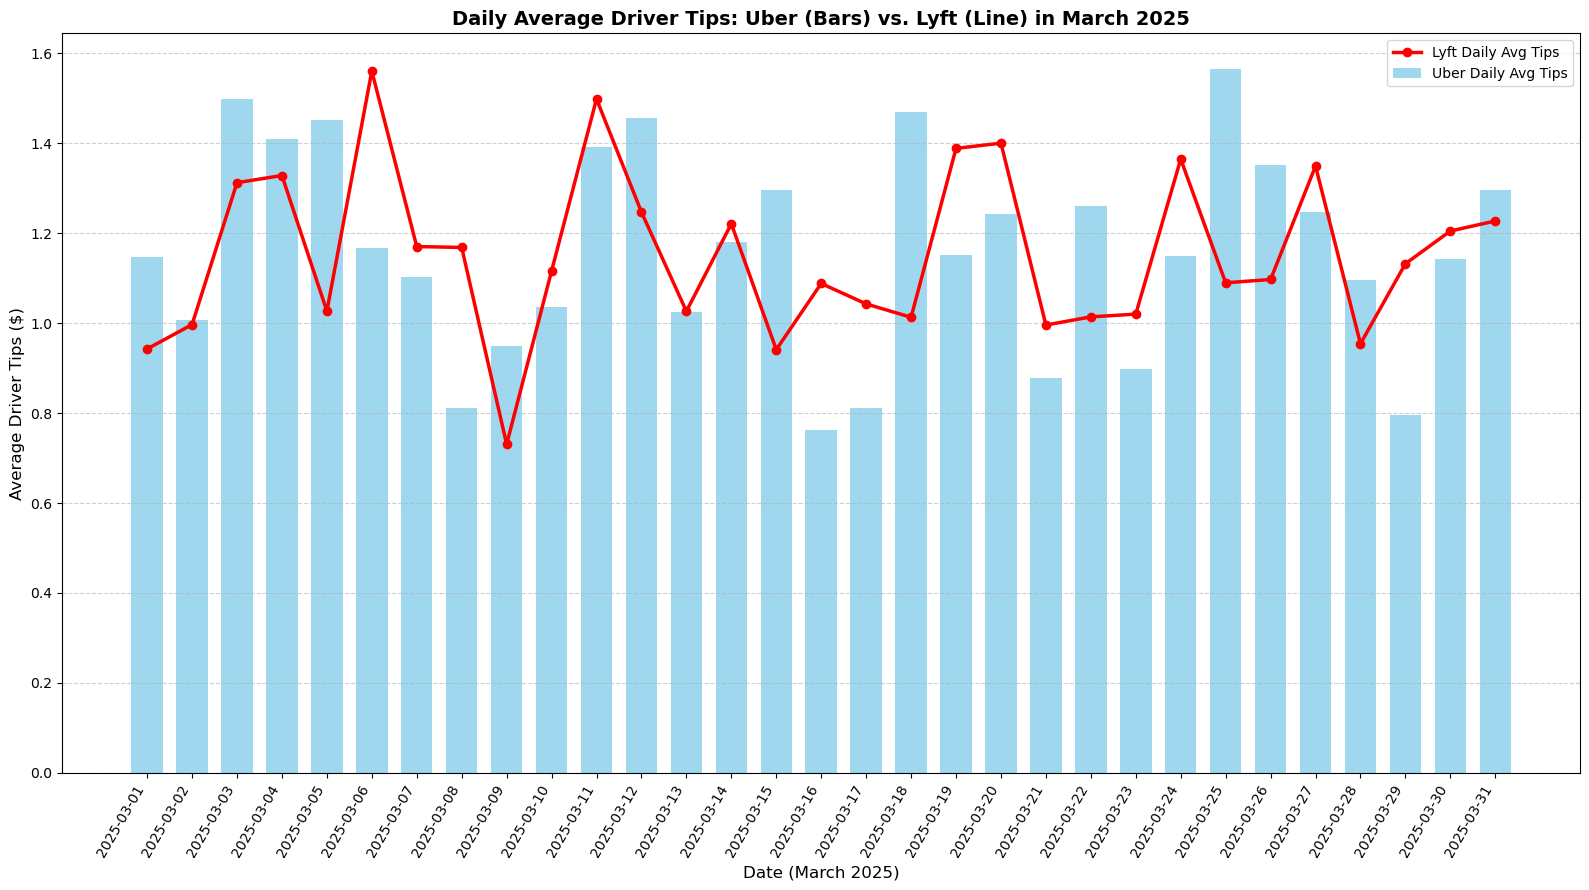

In [60]:
# Create the Bar Plot for Uber and line chart for Lyft 
plt.figure(figsize=(16, 9)) 

# Bar chart for Uber's daily average tips
plt.bar(daily_avg_tips_unstacked.index.astype(str), daily_avg_tips_unstacked['Uber_Daily_Avg_Tips'],
        color='skyblue', label='Uber Daily Avg Tips', width=0.7, alpha=0.8)

# Line graph for Lyft's daily average tips
plt.plot(daily_avg_tips_unstacked.index.astype(str), daily_avg_tips_unstacked['Lyft_Daily_Avg_Tips'],
         color='red', marker='o', linestyle='-', linewidth=2.5, markersize=6,
         label='Lyft Daily Avg Tips')

plt.xlabel('Date (March 2025)', fontsize=12)
plt.ylabel('Average Driver Tips ($)', fontsize=12)
plt.title('Daily Average Driver Tips: Uber (Bars) vs. Lyft (Line) in March 2025', fontsize=14, fontweight='bold')

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()

plt.savefig('images/daily_avg_driver_tips.png')

plt.show()

plt.close('all')

In [62]:
daily_avg_tips_unstacked.head(10)

,Uber_Daily_Avg_Tips,Lyft_Daily_Avg_Tips
pickup_date,,
2025-03-01,1.148041,0.942659
2025-03-02,1.007114,0.996757
2025-03-03,1.498123,1.312431
2025-03-04,1.408662,1.328356
2025-03-05,1.451553,1.026656
2025-03-06,1.166062,1.560698
2025-03-07,1.101736,1.170346
2025-03-08,0.810558,1.168397
2025-03-09,0.948519,0.730679


In [64]:
# converting the index dates to datetime format
daily_avg_tips_unstacked.index = pd.to_datetime(daily_avg_tips_unstacked.index)

In [66]:
# Add a 'weekday' column
daily_avg_tips_unstacked['weekday'] = daily_avg_tips_unstacked.index.day_name()

In [68]:
# Define the order of weekdays for proper sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [70]:
# Calculate the mean
weekly_avg_tips_df = daily_avg_tips_unstacked.groupby('weekday')[['Uber_Daily_Avg_Tips', 'Lyft_Daily_Avg_Tips']].mean()

In [72]:
# reindex the column
weekly_avg_tips_df = weekly_avg_tips_df.reindex(weekday_order)

In [74]:
weekly_avg_tips_df

,Uber_Daily_Avg_Tips,Lyft_Daily_Avg_Tips
weekday,,
Monday,1.158493,1.212640
Tuesday,1.459525,1.232426
Wednesday,1.352834,1.189856
Thursday,1.170403,1.334219
Friday,1.064084,1.085368
Saturday,1.061986,1.039648
Sunday,0.952350,1.008139


In [76]:
# Combine both weekly pay and weekly tips dataframe
combined_weekly_data_df = pd.concat([weekly_avg_pay_df, weekly_avg_tips_df], axis=1)

In [78]:
combined_weekly_data_df

,Uber_Daily_Avg_Pay,Lyft_Daily_Avg_Pay,Uber_Daily_Avg_Tips,Lyft_Daily_Avg_Tips
weekday,,,,
Monday,20.397895,20.368012,1.158493,1.212640
Tuesday,19.554802,19.736196,1.459525,1.232426
Wednesday,21.271590,20.000584,1.352834,1.189856
Thursday,21.778632,20.681471,1.170403,1.334219
Friday,20.181291,19.145469,1.064084,1.085368
Saturday,20.549116,18.710420,1.061986,1.039648
Sunday,21.202896,19.323405,0.952350,1.008139


In [80]:
# Group by both 'weather_condition' and 'hvfhs_license_num'
# Then calculate the mean of 'driver_tips' and unstack 'hvfhs_license_num'
avg_tips_by_weather_service = ride_share_df.groupby(['weather_condition', 'hvfhs_license_num'])['tips'].mean().unstack()

In [82]:
# rename the columns 
column_rename_map = {
    'HV0003': 'Uber_Avg_Tips',
    'HV0005': 'Lyft_Avg_Tips'
}
avg_tips_by_weather_service = avg_tips_by_weather_service.rename(columns=column_rename_map)

In [84]:
# Sort by the average Uber tips
avg_tips_by_weather_service = avg_tips_by_weather_service.sort_values(by='Uber_Avg_Tips', ascending=False)

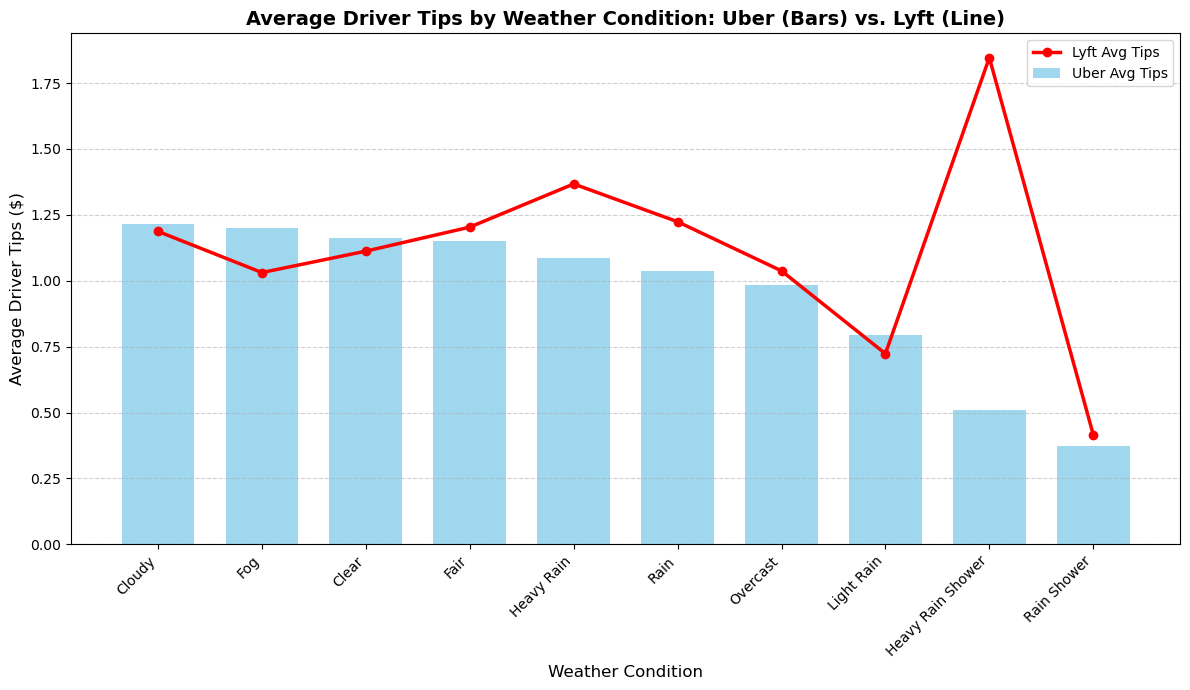

In [86]:
# Create the Bar Plot for Uber and Line Chart for Lyft by Weather Condition
plt.figure(figsize=(12, 7))

# Bar chart for Uber's average tips by weather condition
plt.bar(avg_tips_by_weather_service.index, avg_tips_by_weather_service['Uber_Avg_Tips'],
        color='skyblue', label='Uber Avg Tips', width=0.7, alpha=0.8)

# Line graph for Lyft's average tips by weather condition, overlaid
plt.plot(avg_tips_by_weather_service.index, avg_tips_by_weather_service['Lyft_Avg_Tips'],
         color='red', marker='o', linestyle='-', linewidth=2.5, markersize=6,
         label='Lyft Avg Tips')

plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Average Driver Tips ($)', fontsize=12)
plt.title('Average Driver Tips by Weather Condition: Uber (Bars) vs. Lyft (Line)', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend(fontsize=10)

plt.tight_layout()

plt.savefig('images/avg_driver_tips_weather.png')

plt.show()

plt.close('all')

In [88]:
avg_tips_by_weather_service

hvfhs_license_num,Uber_Avg_Tips,Lyft_Avg_Tips
weather_condition,,
Cloudy,1.216117,1.187250
Fog,1.198736,1.031129
Clear,1.163912,1.112346
Fair,1.151312,1.203544
Heavy Rain,1.086192,1.367342
Rain,1.035393,1.223967
Overcast,0.984855,1.037511
Light Rain,0.795340,0.723302
Heavy Rain Shower,0.508485,1.846552


In [90]:
# Combine both weekly pay and weekly tips dataframe
combined_weekly_tips_df = pd.concat([avg_pay_by_weather_service, avg_tips_by_weather_service], axis=1)

In [92]:
combined_weekly_tips_df

hvfhs_license_num,Uber_Avg_Pay,Lyft_Avg_Pay,Uber_Avg_Tips,Lyft_Avg_Tips
weather_condition,,,,
Light Rain,21.356748,19.254419,0.795340,0.723302
Rain Shower,21.243023,18.994808,0.372326,0.416346
Overcast,21.171387,19.372700,0.984855,1.037511
Cloudy,20.977167,19.491755,1.216117,1.187250
Clear,20.691543,19.467233,1.163912,1.112346
Heavy Rain,20.571088,20.872616,1.086192,1.367342
Fog,19.962874,21.889113,1.198736,1.031129
Rain,19.834712,20.700598,1.035393,1.223967
Fair,19.565498,20.408929,1.151312,1.203544
